<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Classification-Projects/blob/main/06-Banknote_Authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banknote Authentication Classification dataset
- -The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph
## -Features of the dataset
- variance of Wavelet Transformed image (continuous).
- skewness of Wavelet Transformed image (continuous).
- kurtosis of Wavelet Transformed image (continuous).
- entropy of image (continuous).
- class (integer).

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Access Dataset

In [ ]:
# Access Dataset
data = pd.read_csv('data_banknote_authentication.csv')
# Data preparation and Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('SubSet of Data:\n ', data.head(), '\n')

Number of Rows:  1371
Number of Columns:  5 

SubSet of Data:
      3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0 



### Define columns names

In [ ]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
data.columns = labels
print('Columns Names:', data.columns, '\n')
print('Data Describe:\n ', data.describe(), '\n')
print('Data Information:'); print(data.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1371 non-null   float64
 1 

### Check For duplicated values

In [ ]:
# Check For duplicated
print(data.duplicated().any())
duplicated = data.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


### Check correlation

Correlation:
Target      1.000000
Kurtosis    0.155346
Entropy    -0.023200
Skewness   -0.444281
Variance   -0.724655
Name: Target, dtype: float64


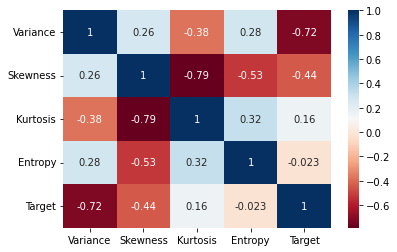

In [ ]:
# Check correlation
print('Correlation:')
print(data.corr()['Target'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
print('Number of Authentication= ', data['Target'][data['Target'] == 0].count())
print('Number of Unauthenticated= ', data['Target'][data['Target'] == 1].count())

Number of Authentication=  761
Number of Unauthenticated=  610


## Data Visualization

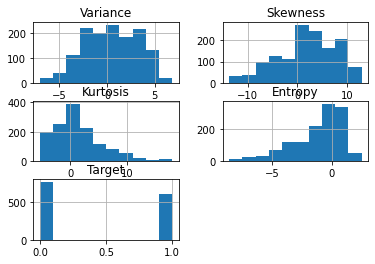

In [ ]:
# Data histogram
data.hist()
plt.show()

From above histograms: kurtosis is positive skewness && Entropy is negative Skewness


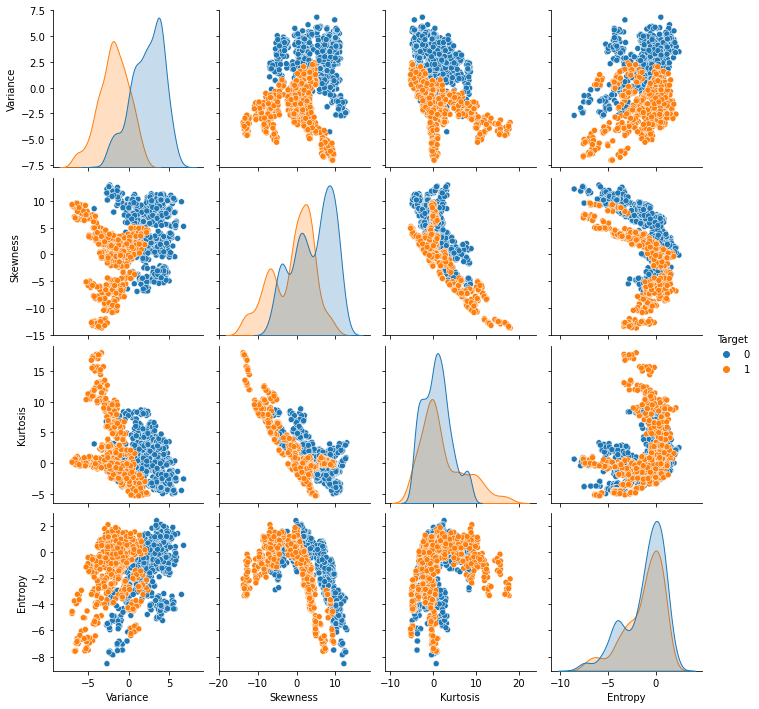

In [ ]:
sns.pairplot(data=data, hue='Target')
plt.show()

## Data Split

In [ ]:
# Data Split
x = data.drop('Target', axis=1).values
y = data['Target'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(959, 4)
(959,)


# Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       229
           1       0.98      0.99      0.98       183

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Accuracy of Logistic Regression Algorithm:  98.54368932038835


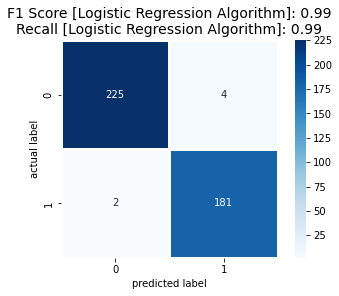

In [ ]:
# Logistic Regression 
log = LogisticRegression()

# fitting data
model = log.fit(X_train, y_train)

# Predicted data
y_predicted = log.predict(X_test)

# Logistic Regression Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_predicted))

# Accuarcy score matrix
print('Accuracy of Logistic Regression Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)

# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion martrix
cm_log = metrics.confusion_matrix(y_test, y_predicted)

# recall 
recall_log = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [Logistic Regression Algorithm]: {f1_score_log:.2f}\n'
          f'Recall [Logistic Regression Algorithm]: {recall_log:.2f}', size=14, color='black')
plt.show()

# KNN Algorithm

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of KNN Algorithm:  100.0


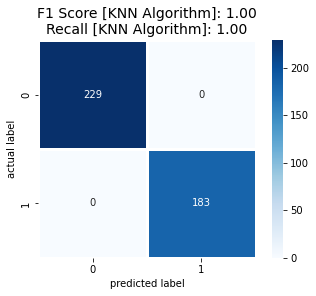

In [ ]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)

# fitting training data
knn.fit(X_train, y_train)

# predicted data
y_predicted = knn.predict(X_test)

# KNN Results

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of KNN Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)
# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_predicted)

# recall
recall_KNN = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall 
plt.title(f'F1 Score [KNN Algorithm]: {f1_score_knn:.2f}\n'
          f'Recall [KNN Algorithm]: {recall_KNN:.2f}', size=14, color='black')
plt.show()

# Naive Bayes Algorithm

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       229
           1       0.85      0.79      0.82       183

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412

Accuracy of Naive Bayes Algorithm:  84.22330097087378


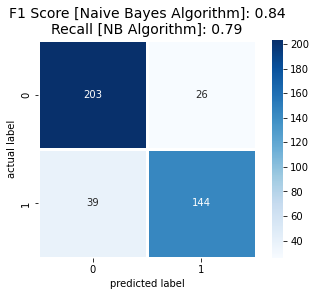

In [ ]:
# Naive Bayes Algorithm
gnb = GaussianNB()

# fitting training data
model = gnb.fit(X_train, y_train)

# predicted data
y_predicted = gnb.predict(X_test)

# Naive Bayes Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
print('Accuracy of Naive Bayes Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)

# F1 Score
f1_score_NB = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test, y_predicted)

# recall
recall_NB = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall 
plt.title(f'F1 Score [Naive Bayes Algorithm]: {f1_score_NB:.2f}\n'
          f'Recall [NB Algorithm]: {recall_NB:.2f}', size=14, color='black')
plt.show()

# SVM

Classification Reports:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       229
           1       0.85      0.79      0.82       183

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412

Accuracy of SVM Algorithm:  84.22330097087378


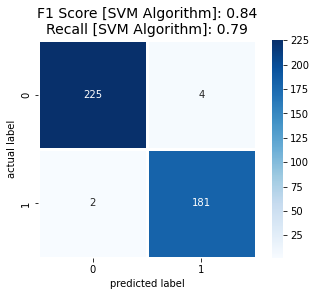

In [ ]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM with c=100.0
svm = SVC(kernel='rbf', C=100.0)

# Fitting data
svm.fit(X_train, y_train)

# predicted data
y_predict = svm.predict(X_test)

# SVM Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_predicted))

# Accuracy score matrix
print('Accuracy of SVM Algorithm: '
      , metrics.accuracy_score(y_test, y_predicted)*100)

# F1 Score
f1_score_SVM = metrics.f1_score(y_test, y_predicted, average='micro')

# confusion matrix
cm_SVM = metrics.confusion_matrix(y_test, y_predicted)

# recall 
recall_SVM = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [SVM Algorithm]: {f1_score_SVM:.2f}\n'
          f'Recall [SVM Algorithm]: {recall_SVM:.2f}', size=14, color='black')
plt.show()
print('\n')

# Comparison between Algorithms by "F1 Score and Recall"

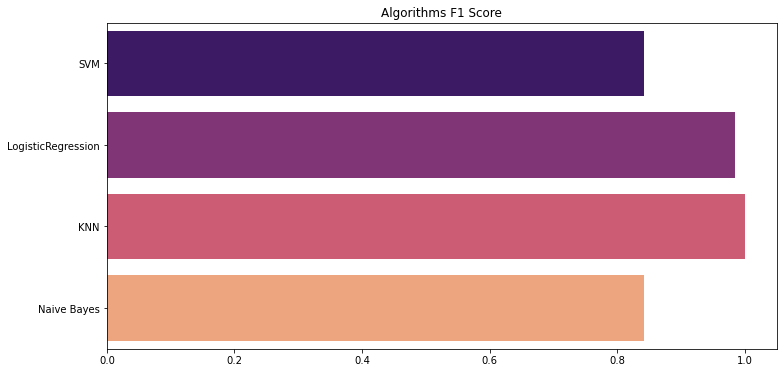

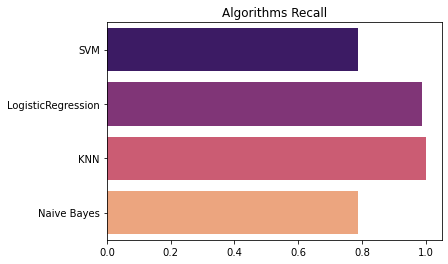

In [ ]:
plt.figure(figsize=(12, 6))
model_f1_score = [f1_score_SVM, f1_score_log, f1_score_knn, f1_score_NB]
recalls = [recall_SVM, recall_log, recall_KNN, recall_NB]
model_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']
recall_name = ['SVM', 'LogisticRegression', 'KNN', 'Naive Bayes']

# Barplot f1 score
sns.barplot(x=model_f1_score, y=model_name, palette='magma')
plt.title('Algorithms F1 Score')
plt.show()

# barplot recall 
sns.barplot(x=recalls, y=recall_name, palette='magma')
plt.title('Algorithms Recall')
plt.show()

## The best Algorithm for this project is K-Nearest neighbours
